In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from seaborn import lineplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn import svm

In [2]:
personnel_df = pd.read_csv("russia_losses_personnel.csv")

In [3]:
personnel_df.head()

,date,day,personnel,personnel*,POW
0,2024-06-09,837,518560,about,NaN
1,2024-06-08,836,517290,about,NaN
2,2024-06-07,835,516080,about,NaN
3,2024-06-06,834,515000,about,NaN
4,2024-06-05,833,513700,about,NaN


In [4]:
personnel_df.drop('personnel*', axis=1, inplace=True)

In [5]:
personnel_df.drop('POW', axis=1, inplace=True)

In [6]:
personnel_df['date'] = pd.to_datetime(personnel_df['date'])

In [7]:
personnel_df['year'] = personnel_df['date'].dt.year
personnel_df['month'] = personnel_df['date'].dt.month
personnel_df['combat_date'] = personnel_df['date'].dt.day

In [8]:
personnel_df.drop(columns=['date'], inplace=True)

In [9]:
personnel_df.rename(columns={'day': 'combat_day'}, inplace=True)

In [10]:
personnel_df.rename(columns={'combat_date': 'day'}, inplace=True)

In [11]:
personnel_df.head()

,combat_day,personnel,year,month,day
0,837,518560,2024,6,9
1,836,517290,2024,6,8
2,835,516080,2024,6,7
3,834,515000,2024,6,6
4,833,513700,2024,6,5


In [12]:
personnel_df['personnel_change'] = personnel_df['personnel'].diff()

In [13]:
personnel_df.head()

,combat_day,personnel,year,month,day,personnel_change
0,837,518560,2024,6,9,NaN
1,836,517290,2024,6,8,-1270.0
2,835,516080,2024,6,7,-1210.0
3,834,515000,2024,6,6,-1080.0
4,833,513700,2024,6,5,-1300.0


In [14]:
personnel_df.fillna(0, inplace=True)

In [15]:
personnel_df.dtypes

combat_day            int64
personnel             int64
year                  int64
month                 int64
day                   int64
personnel_change    float64
dtype: object

In [16]:
personnel_df.mean()

combat_day             419.500000
personnel           200500.017943
year                  2022.821770
month                    6.215311
day                     15.685407
personnel_change      -616.937799
dtype: float64

In [17]:
personnel_df['personnel_change'] = personnel_df['personnel_change'].astype('int64')

<Axes: xlabel='combat_day', ylabel='personnel_change'>

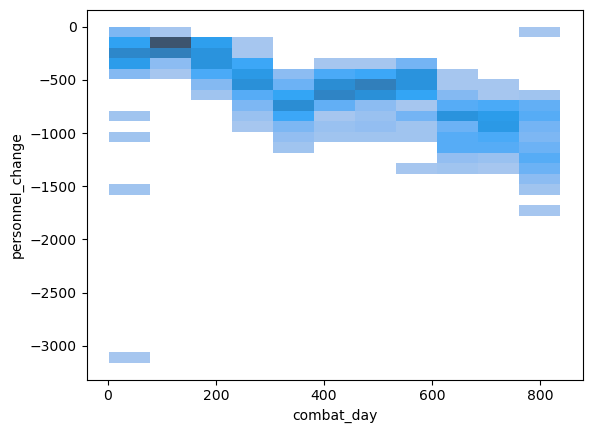

In [18]:
sns.histplot(data=personnel_df, x='combat_day', y='personnel_change')

<Axes: xlabel='combat_day', ylabel='personnel_change'>

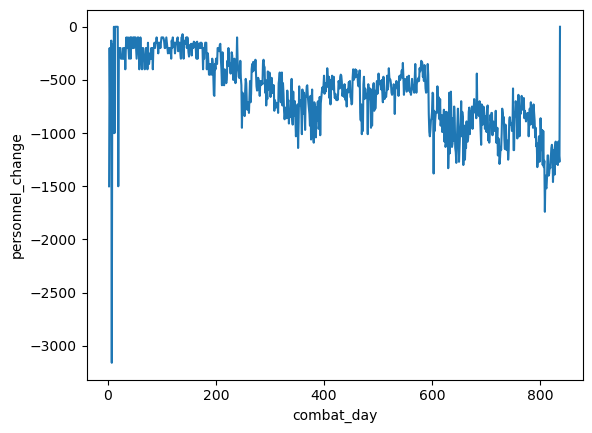

In [19]:
sns.lineplot(data=personnel_df,x='combat_day',y='personnel_change')

<Axes: xlabel='combat_day', ylabel='personnel_change'>

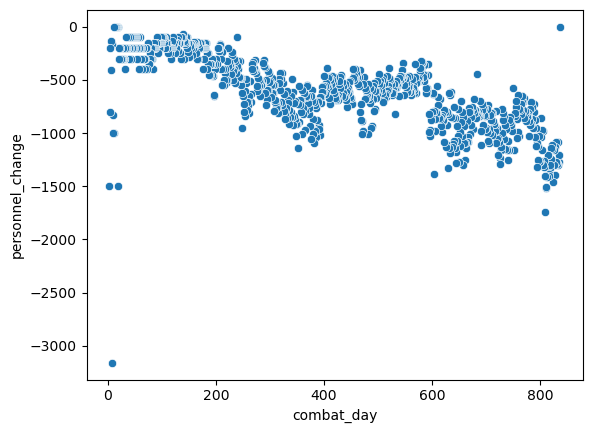

In [20]:
sns.scatterplot(data=personnel_df, x='combat_day', y='personnel_change')

In [21]:
null_values =  personnel_df.isnull()
null_true = null_values.sum().sum()
null_false = null_values.size - null_true
list_of_null = f"{null_true} True and {null_false} False"
print (list_of_null)

0 True and 5016 False


In [22]:
y = personnel_df['personnel_change']
X = personnel_df.drop(columns=['personnel_change'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(y.shape, y_train.shape, y_test.shape)

(836,) (668,) (168,)


In [25]:
neural_model = MLPRegressor()

In [26]:
neural_model.fit(X_train,y_train)

MLPRegressor()

In [27]:
neural_model.score(X_test,y_test)

0.6103337616482606

In [28]:
random_forest_model = RandomForestRegressor()

In [29]:
random_forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [30]:
random_forest_model.score(X_test,y_test)

0.6406428723178614

In [31]:
logical_model = LogisticRegression(max_iter=100)

In [32]:
logical_model.fit(X_train,y_train)

c:\Users\nille\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
logical_model.score(X_test,y_test)

0.08333333333333333

In [34]:
liner_model = LinearRegression()

In [35]:
liner_model.fit(X_train,y_train)

LinearRegression()

In [36]:
liner_model.score(X_test,y_test)

0.690005593628639

In [37]:
predictions = neural_model.predict(X_test)
ame = mean_absolute_error(y_test,predictions)
print("Absolute Mean Error:", ame)

Absolute Mean Error: 166.31810855497605


In [38]:
predictions_2 = random_forest_model.predict(X_test)
ame_2 = mean_absolute_error(y_test,predictions_2)
print("Absolute Mean Error:", ame_2)

Absolute Mean Error: 115.36660714285715


In [39]:
predictions_3 = logical_model.predict(X_test)
ame_3 = mean_absolute_error(y_test,predictions_3)
print("Absolute Mean Error:", ame_3)

Absolute Mean Error: 189.01785714285714


In [40]:
predictions_4 = liner_model.predict(X_test)
ame_4 = mean_absolute_error(y_test,predictions_4)
print("Absolute Mean Error:", ame_4)

Absolute Mean Error: 152.80457329532751


In [41]:
neural_model = pd.DataFrame (data= {'real values': y_test,
                              'predicted  vaules': predictions})
neural_model['difference'] = neural_model['predicted  vaules'] - neural_model['real values']
neural_model

,real values,predicted vaules,difference
611,-380,-370.913960,9.086040
823,0,-447.338329,-447.338329
290,-470,-706.703680,-236.703680
801,-200,-305.589401,-105.589401
168,-760,-861.817311,-101.817311
...,...,...,...
653,-250,-350.060348,-100.060348
456,-1090,-531.516488,558.483512
778,-200,-303.483854,-103.483854
532,-550,-446.792204,103.207796


In [42]:
random_forest_model = pd.DataFrame (data= {'real values': y_test,
                              'predicted  vaules': predictions_2})
random_forest_model['difference'] = random_forest_model['predicted  vaules'] - random_forest_model['real values']
random_forest_model

,real values,predicted vaules,difference
611,-380,-382.0,-2.0
823,0,-50.0,-50.0
290,-470,-587.7,-117.7
801,-200,-177.0,23.0
168,-760,-880.0,-120.0
...,...,...,...
653,-250,-331.0,-81.0
456,-1090,-911.1,178.9
778,-200,-263.5,-63.5
532,-550,-622.6,-72.6


In [43]:
y_pred = liner_model.predict(X_test)

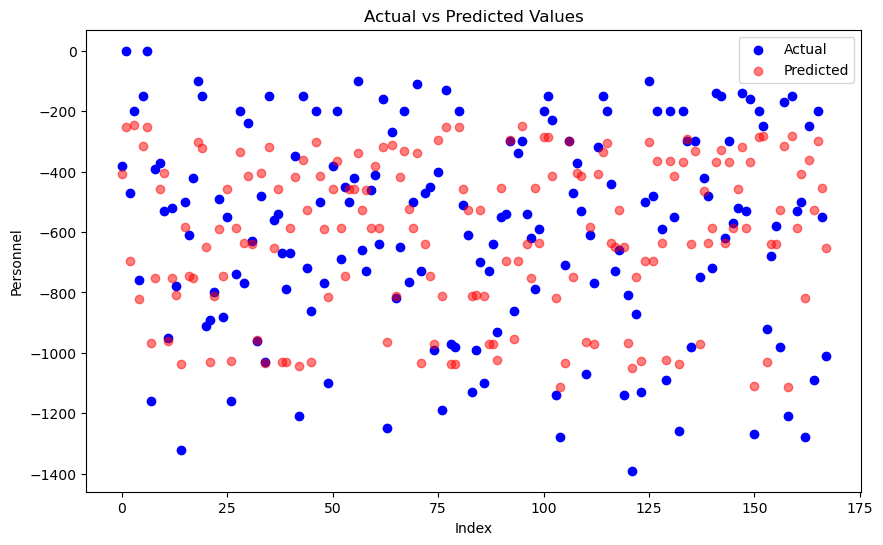

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Personnel')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [45]:
y_pred_2 = logical_model.predict(X_test)

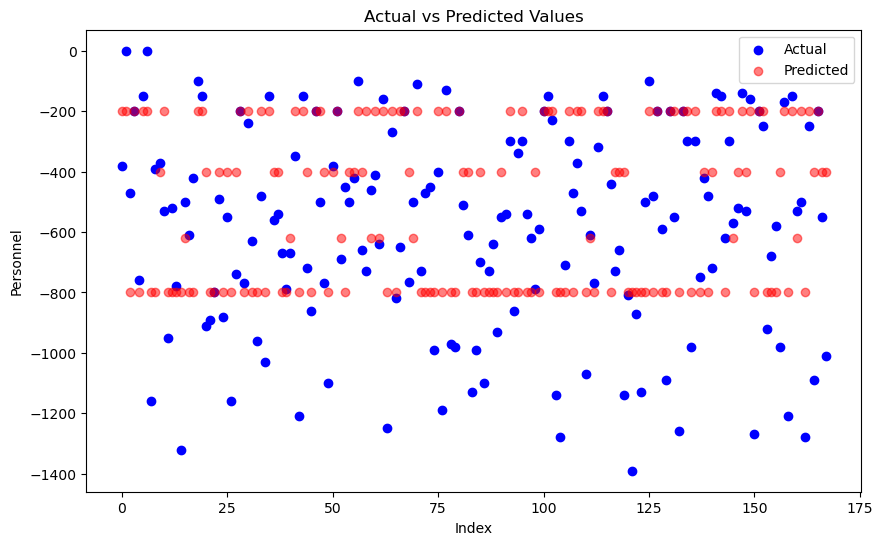

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_2)), y_pred_2, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Personnel')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [47]:
y_pred_3 = liner_model.predict(X_test)

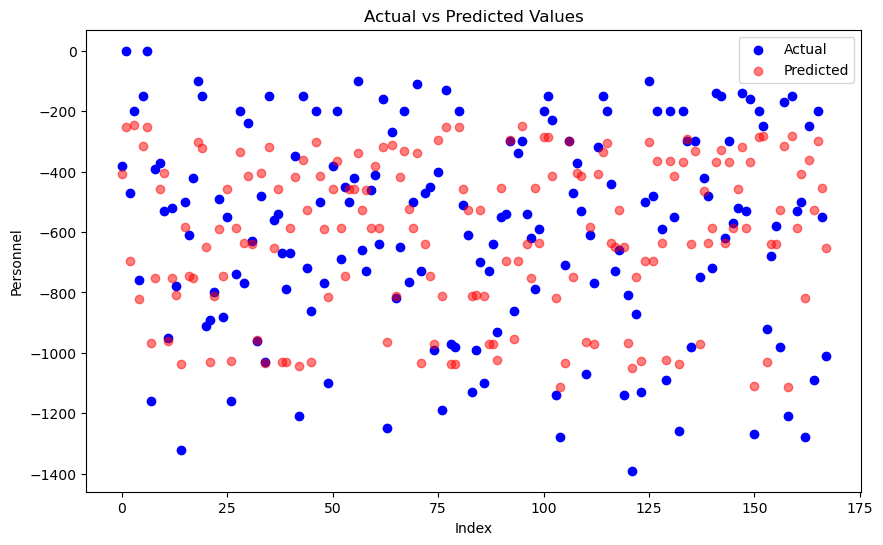

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred_3)), y_pred_3, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Personnel')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()